In [1]:
# Data Manipulation and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Clustering and Distance Metrics
from sklearn.cluster import KMeans
from scipy.spatial import distance

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Model Evaluation
from sklearn.metrics import silhouette_score, accuracy_score, confusion_matrix

# Pipeline and Dimensionality Reduction
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA

# Model Training and Validation
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, cross_val_score

# Elbow Method for KMeans Clustering
from yellowbrick.cluster import KElbowVisualizer

# Pandas display settings
pd.set_option('display.max_columns', None)

In [2]:
olist = pd.read_csv('Olist - E-Commerce Customer Data.csv').drop(columns='Unnamed: 0')
olist['default'] = olist['order_item_id'].apply(lambda x: 1 if x > 1 else 0)

#olist, amostra = train_test_split(olist, train_size = .20)

display(olist.head())

print(round(olist.default.value_counts(normalize=True) * 100, 2))
print(olist.default.value_counts())
print(olist.shape)

,order_id,order_item_id,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_id,seller_city,seller_state,seller_zip_code_prefix,payment_type,payment_sequential,payment_installments,installments_price,price,freight_value,payment_value,shipping_limit_date,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,shipping_duration,day_of_purchase,month_of_purchase,year_of_purchase,month/year_of_purchase,order_status,order_unique_id,default
0,00010242fe8c5a6d1ba2dd792cb16214,1,3ce436f183e68e07877b285a838db11a,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,27277,credit_card,1,2,36.0,58.9,13.29,72.19,2017-09-19 09:45:35,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00,7 days 14:44:46,Wednesday,September,2017,September-2017,delivered,00010242fe8c5a6d1ba2dd792cb16214-1,0
1,130898c0987d1801452a8ed92a670612,1,e6eecc5a77de221464d1c4eaff0a9b64,0fb8e3eab2d3e79d92bb3fffbb97f188,75800,jatai,GO,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,27277,boleto,1,1,74.0,55.9,17.96,73.86,2017-07-05 02:44:11,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00,15 days 08:47:09,Wednesday,June,2017,June-2017,delivered,130898c0987d1801452a8ed92a670612-1,0
2,532ed5e14e24ae1f0d735b91524b98b9,1,4ef55bf80f711b372afebcb7c715344a,3419052c8c6b45daf79c1e426f9e9bcb,30720,belo horizonte,MG,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,27277,credit_card,1,2,41.5,64.9,18.33,83.23,2018-05-23 10:56:25,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00,17 days 08:08:33,Friday,May,2018,May-2018,delivered,532ed5e14e24ae1f0d735b91524b98b9-1,0
3,6f8c31653edb8c83e1a739408b5ff750,1,30407a72ad8b3f4df4d15369126b20c9,e7c828d22c0682c1565252deefbe334d,83070,sao jose dos pinhais,PR,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,27277,credit_card,1,3,25.0,58.9,16.17,75.07,2017-08-07 18:55:08,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00,8 days 02:47:51,Tuesday,August,2017,August-2017,delivered,6f8c31653edb8c83e1a739408b5ff750-1,0
4,7d19f4ef4d04461989632411b7e588b9,1,91a792fef70ecd8cc69d3c7feb3d12da,0bb98ba72dcc08e95f9d8cc434e9a2cc,36400,conselheiro lafaiete,MG,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,48436dade18ac8b2bce089ec2a041202,volta redonda,SP,27277,credit_card,1,4,18.0,58.9,13.29,72.19,2017-08-16 22:05:11,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00,13 days 22:15:41,Thursday,August,2017,August-2017,delivered,7d19f4ef4d04461989632411b7e588b9-1,0


default
0    87.57
1    12.43
Name: proportion, dtype: float64
default
0    99299
1    14091
Name: count, dtype: int64
(113390, 41)


<Axes: >

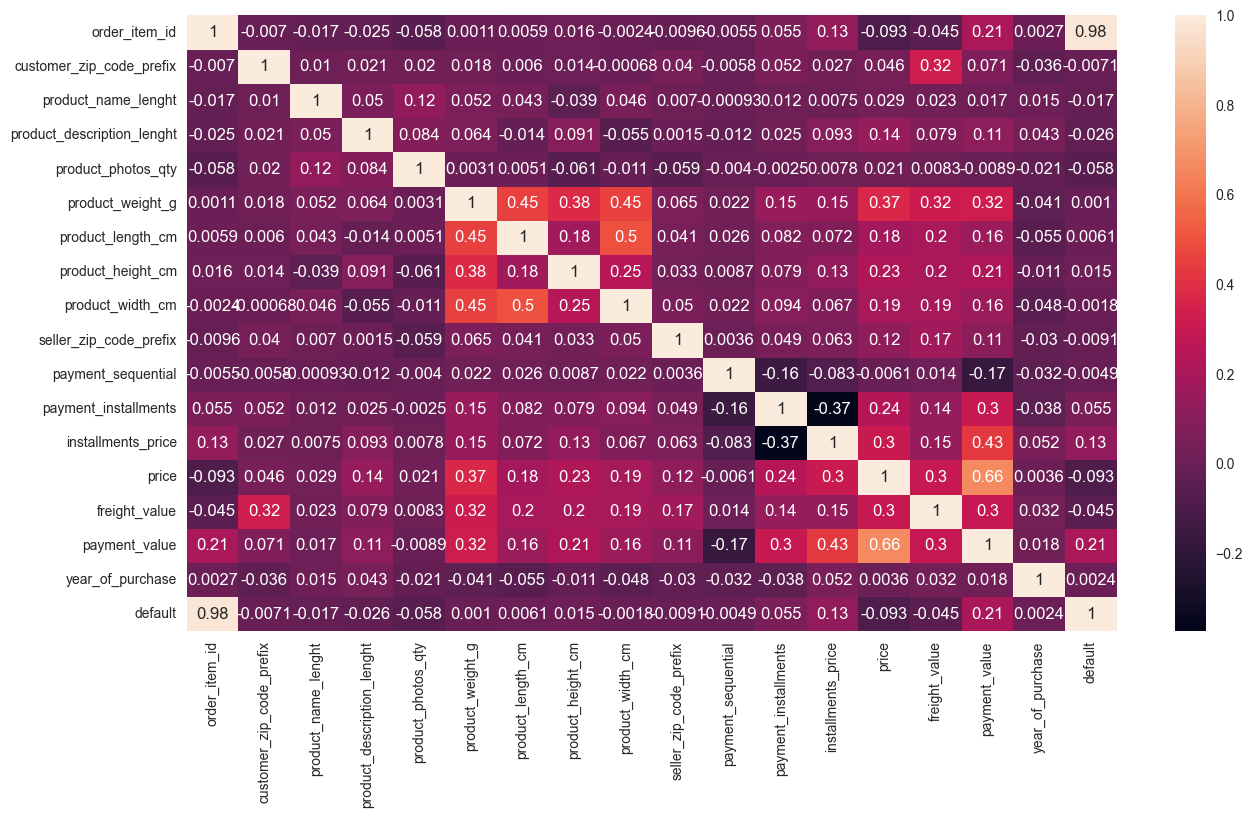

In [3]:
numeric_df = olist.select_dtypes(include=['number'])

corr = numeric_df.corr(method='kendall')
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=True)

- **Installments price (0.12)**: C'è una correlazione positiva (anche se moderata) con il default, suggerendo che un aumento del prezzo delle rate potrebbe essere associato a un rischio maggiore di default.
- **Payment value (0.07)**: Anche qui c'è una correlazione positiva moderata, ma inferiore rispetto al `installments price`.
- **Freight value (-0.03)**: La correlazione è negativa, ma molto debole, il che suggerisce un impatto limitato.
- **Price (-0.09)**: La correlazione è negativa, suggerendo che un prezzo più elevato potrebbe essere associato a una riduzione del rischio di default, anche se l'impatto è debole.

In [4]:
columns = ['customer_state',
          'product_id', 'product_category_name', 'product_name_lenght',
          'product_description_lenght', 'product_weight_g',
          'product_length_cm', 'product_height_cm', 'product_width_cm', 'seller_state',
          'payment_type', 'payment_sequential', 'payment_installments',
          'installments_price', 'price', 'freight_value', 'payment_value',
          'default']

olist = olist[columns]
olist.head()

,customer_state,product_id,product_category_name,product_name_lenght,product_description_lenght,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_state,payment_type,payment_sequential,payment_installments,installments_price,price,freight_value,payment_value,default
0,RJ,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,SP,credit_card,1,2,36.0,58.9,13.29,72.19,0
1,GO,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,SP,boleto,1,1,74.0,55.9,17.96,73.86,0
2,MG,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,SP,credit_card,1,2,41.5,64.9,18.33,83.23,0
3,PR,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,SP,credit_card,1,3,25.0,58.9,16.17,75.07,0
4,MG,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.0,598.0,650.0,28.0,9.0,14.0,SP,credit_card,1,4,18.0,58.9,13.29,72.19,0


In [5]:
olist.shape

(113390, 18)

### Bilancio

In [6]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek

def bilanciare_default(df, target_col='default', method='smote'):
    """
    Funzione per bilanciare le classi nel dataset per la colonna 'default'.

    Parametri:
    df : pd.DataFrame - Il dataset di input.
    target_col : str - La colonna target (default è 'default').
    method : str - Il metodo di bilanciamento ('smote', 'undersample', 'combine').

    Ritorna:
    pd.DataFrame - Il dataframe bilanciato.
    """
    
    # Separazione delle caratteristiche (X) e della variabile target (y)
    X = df.drop(columns=[target_col])
    y = df[target_col]

    if method == 'smote':
        # Oversampling con SMOTE
        smote = SMOTE(random_state=42)
        X_bal, y_bal = smote.fit_resample(X, y)
    
    elif method == 'undersample':
        # Undersampling
        undersample = RandomUnderSampler(random_state=42)
        X_bal, y_bal = undersample.fit_resample(X, y)
    
    elif method == 'combine':
        # Combinazione di SMOTE e Tomek Links
        smote_tomek = SMOTETomek(random_state=42)
        X_bal, y_bal = smote_tomek.fit_resample(X, y)
    
    else:
        raise ValueError("Metodo non valido. Scegli tra 'smote', 'undersample' o 'combine'.")
    
    # Ricreare il dataframe bilanciato
    df_bal = pd.concat([X_bal, y_bal], axis=1)
    
    return df_bal

# Esempio di utilizzo
df_bilanciato = bilanciare_default(olist, target_col='default', method='undersample')

# Mostra il bilanciamento delle classi
print(df_bilanciato['default'].value_counts())

default
0    14091
1    14091
Name: count, dtype: int64


In [7]:
df_bilanciato.to_csv('olist_model_data.csv')

In [9]:
df_bilanciato.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28182 entries, 24332 to 113389
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   customer_state              28182 non-null  object 
 1   product_id                  28182 non-null  object 
 2   product_category_name       28182 non-null  object 
 3   product_name_lenght         28182 non-null  float64
 4   product_description_lenght  28182 non-null  float64
 5   product_weight_g            28182 non-null  float64
 6   product_length_cm           28182 non-null  float64
 7   product_height_cm           28182 non-null  float64
 8   product_width_cm            28182 non-null  float64
 9   seller_state                28182 non-null  object 
 10  payment_type                28182 non-null  object 
 11  payment_sequential          28182 non-null  int64  
 12  payment_installments        28182 non-null  int64  
 13  installments_price          281